# Import the libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


# Data Overview

In [2]:
df = pd.read_csv('Data/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               2240 non-null   int64  
 1   birth_year                2240 non-null   int64  
 2   education_level           2199 non-null   object 
 3   marital_status            2240 non-null   object 
 4   annual_income             2173 non-null   float64
 5   num_children              2240 non-null   int64  
 6   num_teenagers             2196 non-null   float64
 7   signup_date               2240 non-null   object 
 8   days_since_last_purchase  2240 non-null   int64  
 9   has_recent_complaint      2240 non-null   int64  
 10  spend_wine                2240 non-null   int64  
 11  spend_fruits              2240 non-null   int64  
 12  spend_meat                2240 non-null   int64  
 13  spend_fish                2240 non-null   int64  
 14  spend_sw

###### we need convert "education_level", "marital_status", "signup_date"

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
birth_year,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
annual_income,2173.0,52266.031293,25274.007394,1730.0,35196.00,51411.0,68487.00,666666.0
num_children,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
num_teenagers,2196.0,0.506375,0.543720,0.0,0.00,0.0,1.00,2.0
days_since_last_purchase,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
has_recent_complaint,2240.0,0.009375,0.096391,0.0,0.00,0.0,0.00,1.0
spend_wine,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
spend_fruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
spend_meat,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0


###### threre are nulls

##### Count of values

In [5]:
counts_all = {col: df[col].value_counts() for col in df.columns}
counts_all

{'customer_id': customer_id
 1448     1
 10659    1
 7366     1
 6261     1
 9246     1
         ..
 5324     1
 6182     1
 4141     1
 2174     1
 5524     1
 Name: count, Length: 2240, dtype: int64,
 'birth_year': birth_year
 1976    89
 1971    87
 1975    83
 1972    79
 1978    77
 1970    77
 1965    74
 1973    74
 1969    71
 1974    69
 1956    55
 1979    53
 1958    53
 1977    52
 1952    52
 1959    51
 1968    51
 1966    50
 1954    50
 1955    49
 1960    49
 1963    45
 1982    45
 1967    44
 1962    44
 1957    43
 1951    43
 1983    42
 1986    42
 1964    42
 1981    39
 1980    39
 1984    38
 1961    36
 1953    35
 1985    32
 1949    30
 1989    30
 1950    29
 1988    29
 1987    27
 1948    21
 1990    18
 1946    16
 1947    16
 1991    15
 1992    13
 1945     8
 1943     7
 1944     7
 1995     5
 1993     5
 1994     3
 1996     2
 1900     1
 1893     1
 1899     1
 1941     1
 1940     1
 Name: count, dtype: int64,
 'education_level': education_level


###### this coulmns the majority of values are zero 'has_recent_complaint''accepted_campaign_1''accepted_campaign_2''accepted_campaign_3''accepted_campaign_4''accepted_campaign_5' 'accepted_last_campaign'. we will drop sum or make a feature engineering at the a new column

In [6]:
backup = df.copy()

## Featre extreaction
we need to know the client will accept for the next campaign or not

In [7]:
campaign_columns = ['accepted_campaign_1', 'accepted_campaign_2', 'accepted_campaign_3', 'accepted_campaign_4', 'accepted_campaign_5']

In [8]:
df['total_accepted_campaigns'] = df[campaign_columns].sum(axis=1)

In [9]:
df['total_accepted_campaigns'].value_counts()

,count
total_accepted_campaigns,
0,1777
1,325
2,83
3,44
4,11


In [10]:
ref_year = 2014
df['age'] = ref_year - df['birth_year']


def parse_date(s):
    for fmt in ('%d-%m-%Y','%d/%m/%Y','%m/%d/%Y','%d-%m-%y','%d/%m/%y'):
        try:
            return pd.to_datetime(s, format=fmt)
        except:
            continue
    # fallback: let pandas try
    try:
        return pd.to_datetime(s, dayfirst=True, errors='coerce')
    except:
        return pd.NaT

we use 2014 because this is the last year at sign up data

In [11]:
df['signup_date_parsed'] = df['signup_date'].apply(parse_date)
print("Unparsed signup_date:", df['signup_date_parsed'].isna().sum())

df['signup_year'] = df['signup_date_parsed'].dt.year.fillna(0).astype(int)

Unparsed signup_date: 0


we need to parse the signup_data to data type to make a signup year column  

### Clean the data

In [12]:
df.drop(columns=['has_recent_complaint','accepted_campaign_1','accepted_campaign_2','accepted_campaign_3','accepted_campaign_4','accepted_campaign_5','accepted_last_campaign','customer_id','signup_date_parsed', 'birth_year', 'signup_date'],axis=1,inplace=True)
df.head()

,education_level,marital_status,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year
0,Graduation,Single,58138.0,0,0.0,58,635,88,546,172,88,88,3,8,10,4,7,0,57,2012
1,Graduation,Single,46344.0,1,1.0,38,11,1,6,2,1,6,2,1,1,2,5,0,60,2014
2,Graduation,Together,71613.0,0,0.0,26,426,49,127,111,21,42,1,8,2,10,4,0,49,2013
3,Graduation,Together,26646.0,1,0.0,26,11,4,20,10,3,5,2,2,0,4,6,0,30,2014
4,PhD,Married,58293.0,1,0.0,94,173,43,118,46,27,15,5,5,3,6,5,0,33,2014


In [13]:
df.isnull().sum()

,0
education_level,41
marital_status,0
annual_income,67
num_children,0
num_teenagers,44
days_since_last_purchase,0
spend_wine,0
spend_fruits,0
spend_meat,0
spend_fish,0


###### i will try the median

In [14]:
df['num_teenagers'].fillna(df['num_teenagers'].mode()[0], inplace=True)

In [15]:
df['education_level'].fillna(df['education_level'].mode()[0], inplace=True)

In [16]:
df['annual_income'].fillna(df['annual_income'].mode()[0], inplace=True)

##### duplicates

In [17]:
df.duplicated().sum()

np.int64(183)

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# EDA


## Analyze Numerical Feature Distributions

Visualize the distributions of numerical features using histograms and box plots to identify their spread, central tendency, and potential outliers.


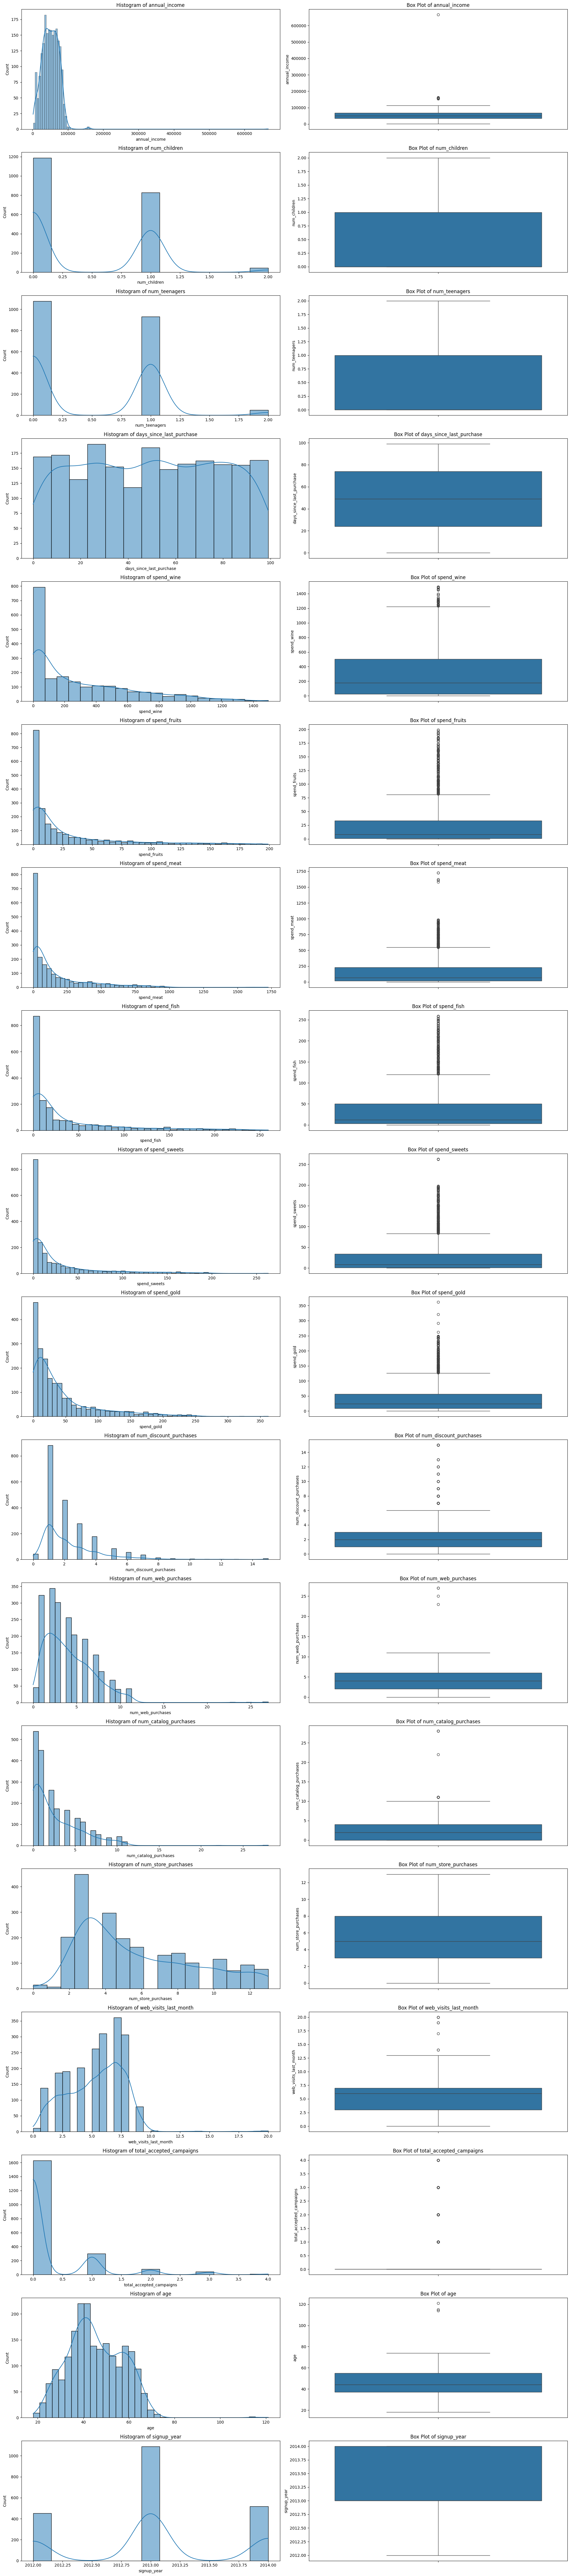

In [19]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, 2*i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(len(numerical_cols), 2, 2*i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

## Analyze Categorical Feature Distributions


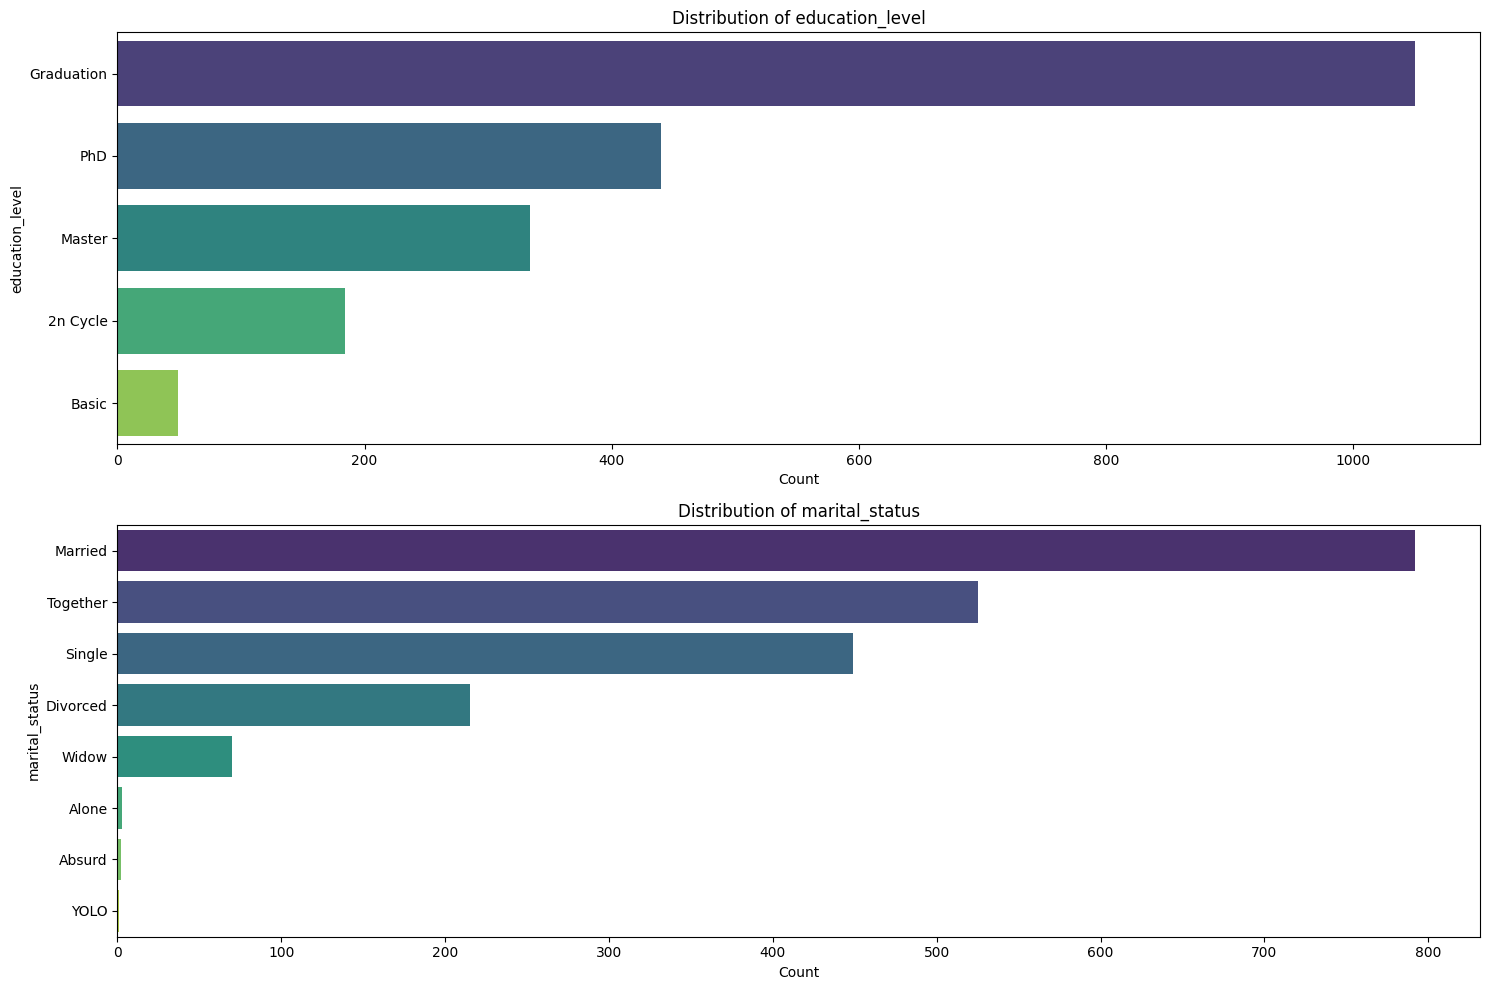

In [20]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop('signup_date', errors='ignore')

plt.figure(figsize=(15, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


## Analyze Numerical Feature Correlations

### Subtask:
Explore correlations between numerical features using a heatmap to identify strong positive or negative relationships.

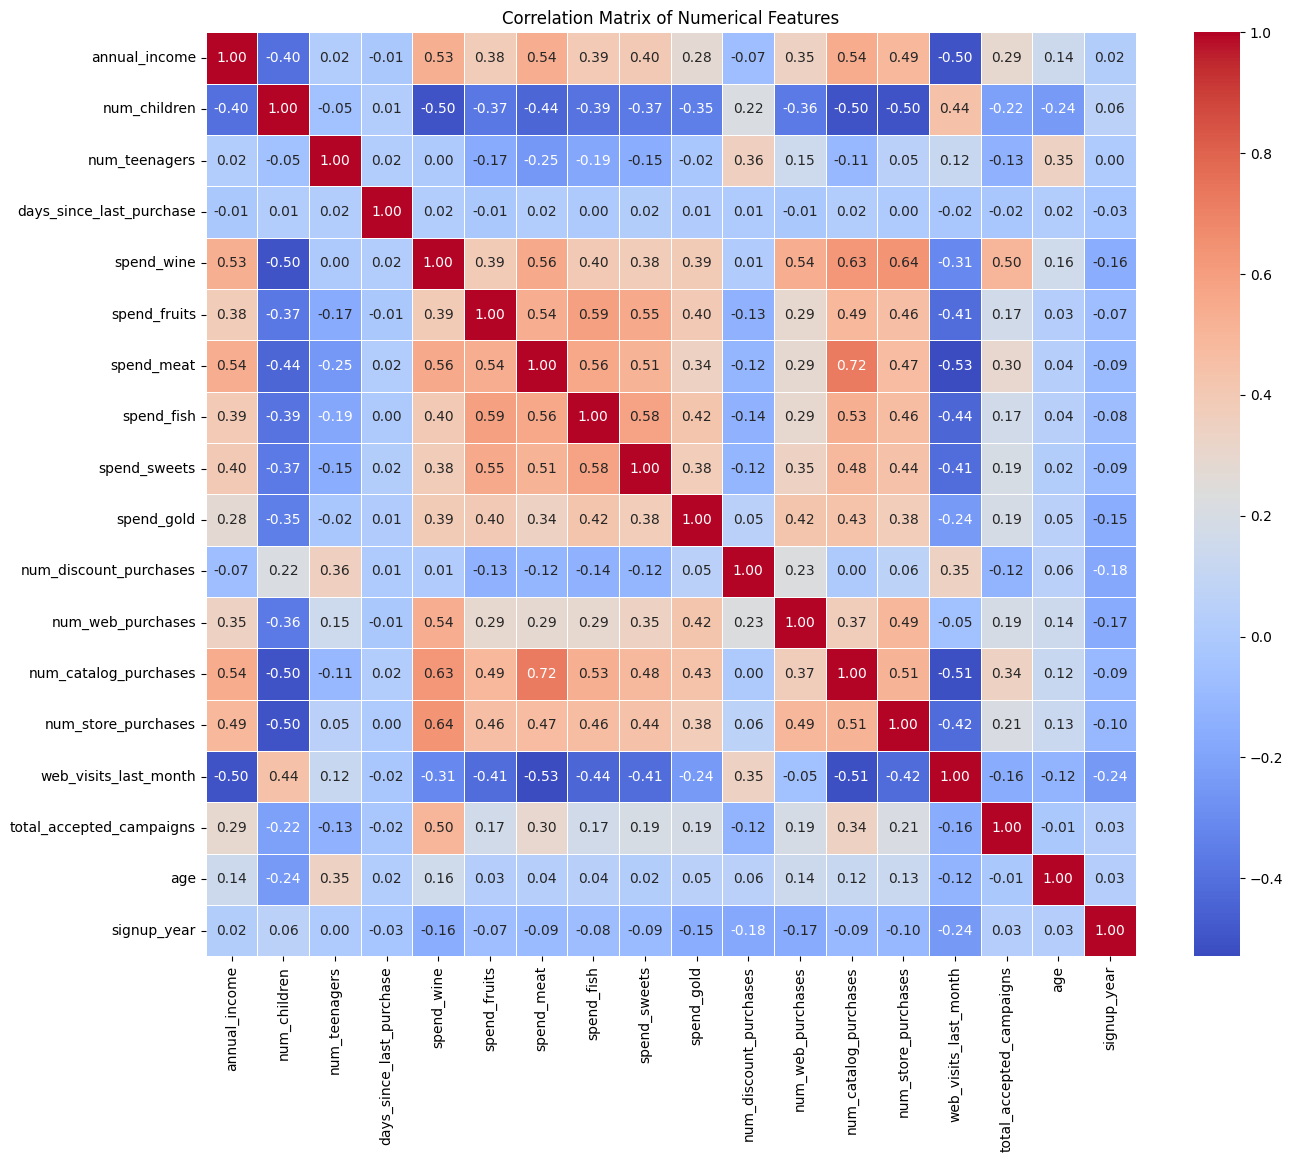

Generated a heatmap of correlations between numerical features.


In [21]:
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("Generated a heatmap of correlations between numerical features.")

## Analyze `total_accepted_campaigns` Feature

### Subtask:
Examine the distribution and relationships of the 'total_accepted_campaigns' feature.

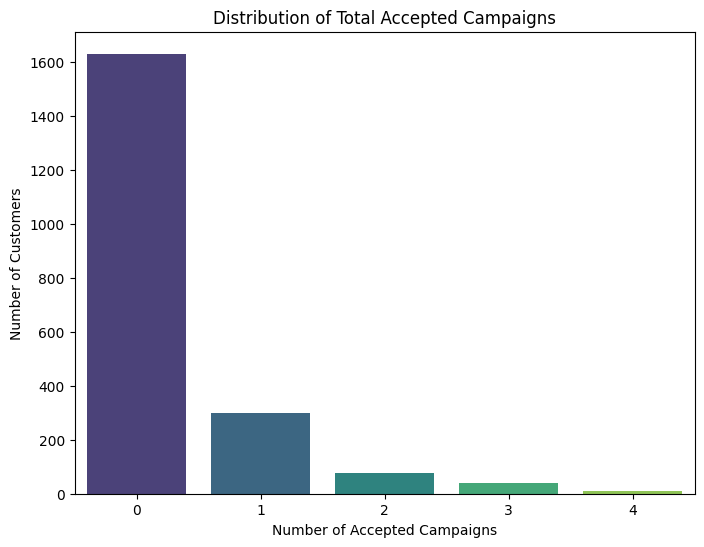

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='total_accepted_campaigns', data=df, palette='viridis')
plt.title('Distribution of Total Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Number of Customers')
plt.show()


## Analyze 'total_accepted_campaigns' feature relationships

relationships between 'total_accepted_campaigns' and other relevant features, such as 'annual_income' and 'education_level'.


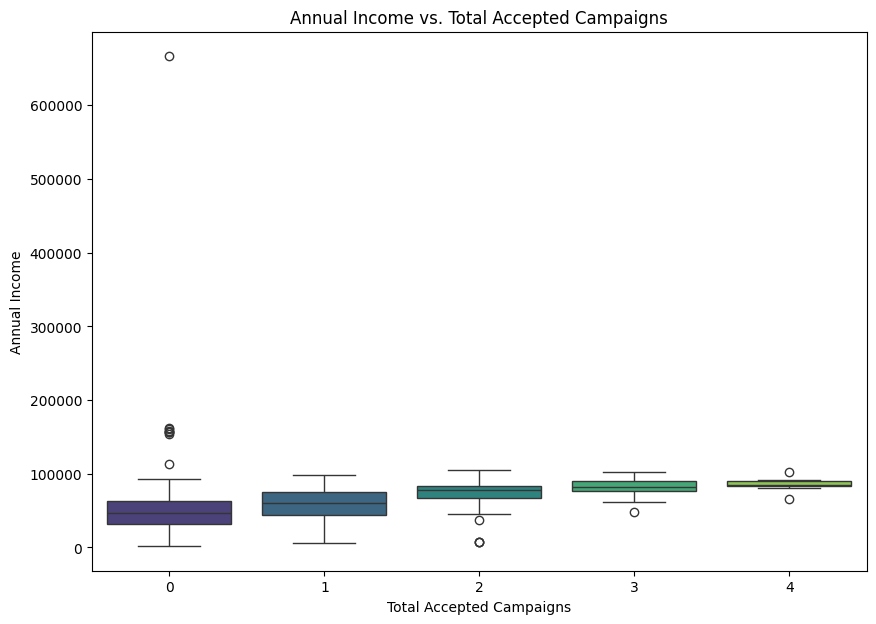

In [23]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='total_accepted_campaigns', y='annual_income', data=df, palette='viridis')
plt.title('Annual Income vs. Total Accepted Campaigns')
plt.xlabel('Total Accepted Campaigns')
plt.ylabel('Annual Income')
plt.show()


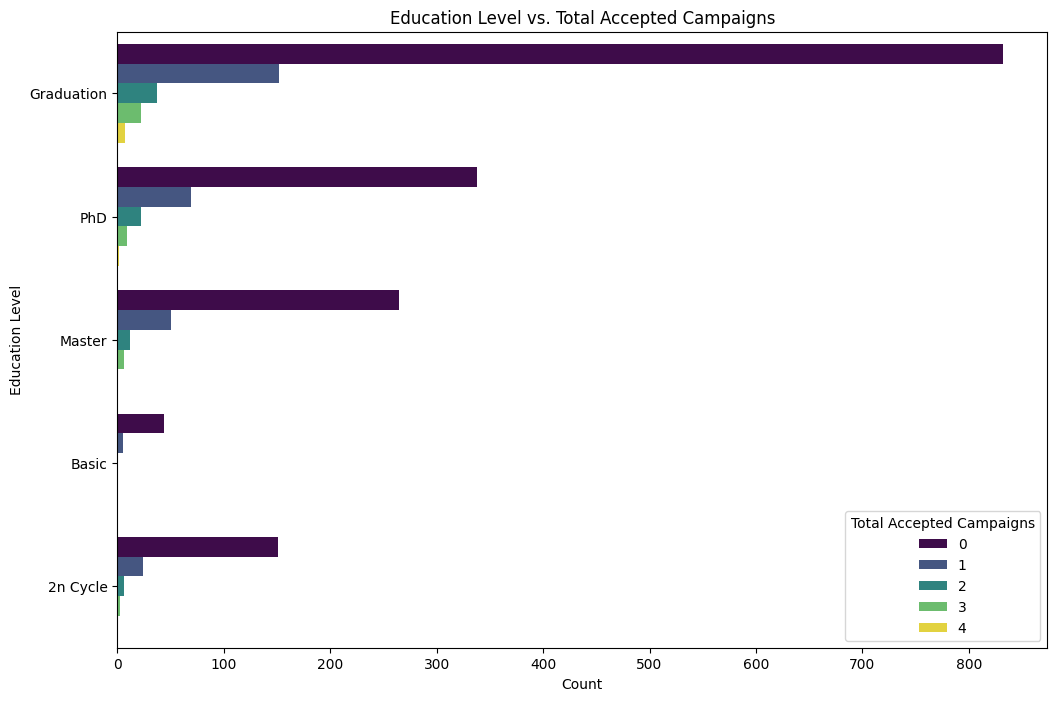

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(y='education_level', hue='total_accepted_campaigns', data=df, palette='viridis')
plt.title('Education Level vs. Total Accepted Campaigns')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Total Accepted Campaigns')
plt.show()


# Preprocessing

#### Handle outliers

In [25]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    # print(f"Outliers detected by IQR:\n{outliers_iqr}")
    print (outliers_iqr.count())



education_level             8
marital_status              8
annual_income               8
num_children                8
num_teenagers               8
days_since_last_purchase    8
spend_wine                  8
spend_fruits                8
spend_meat                  8
spend_fish                  8
spend_sweets                8
spend_gold                  8
num_discount_purchases      8
num_web_purchases           8
num_catalog_purchases       8
num_store_purchases         8
web_visits_last_month       8
total_accepted_campaigns    8
age                         8
signup_year                 8
dtype: int64
education_level             0
marital_status              0
annual_income               0
num_children                0
num_teenagers               0
days_since_last_purchase    0
spend_wine                  0
spend_fruits                0
spend_meat                  0
spend_fish                  0
spend_sweets                0
spend_gold                  0
num_discount_purchases     

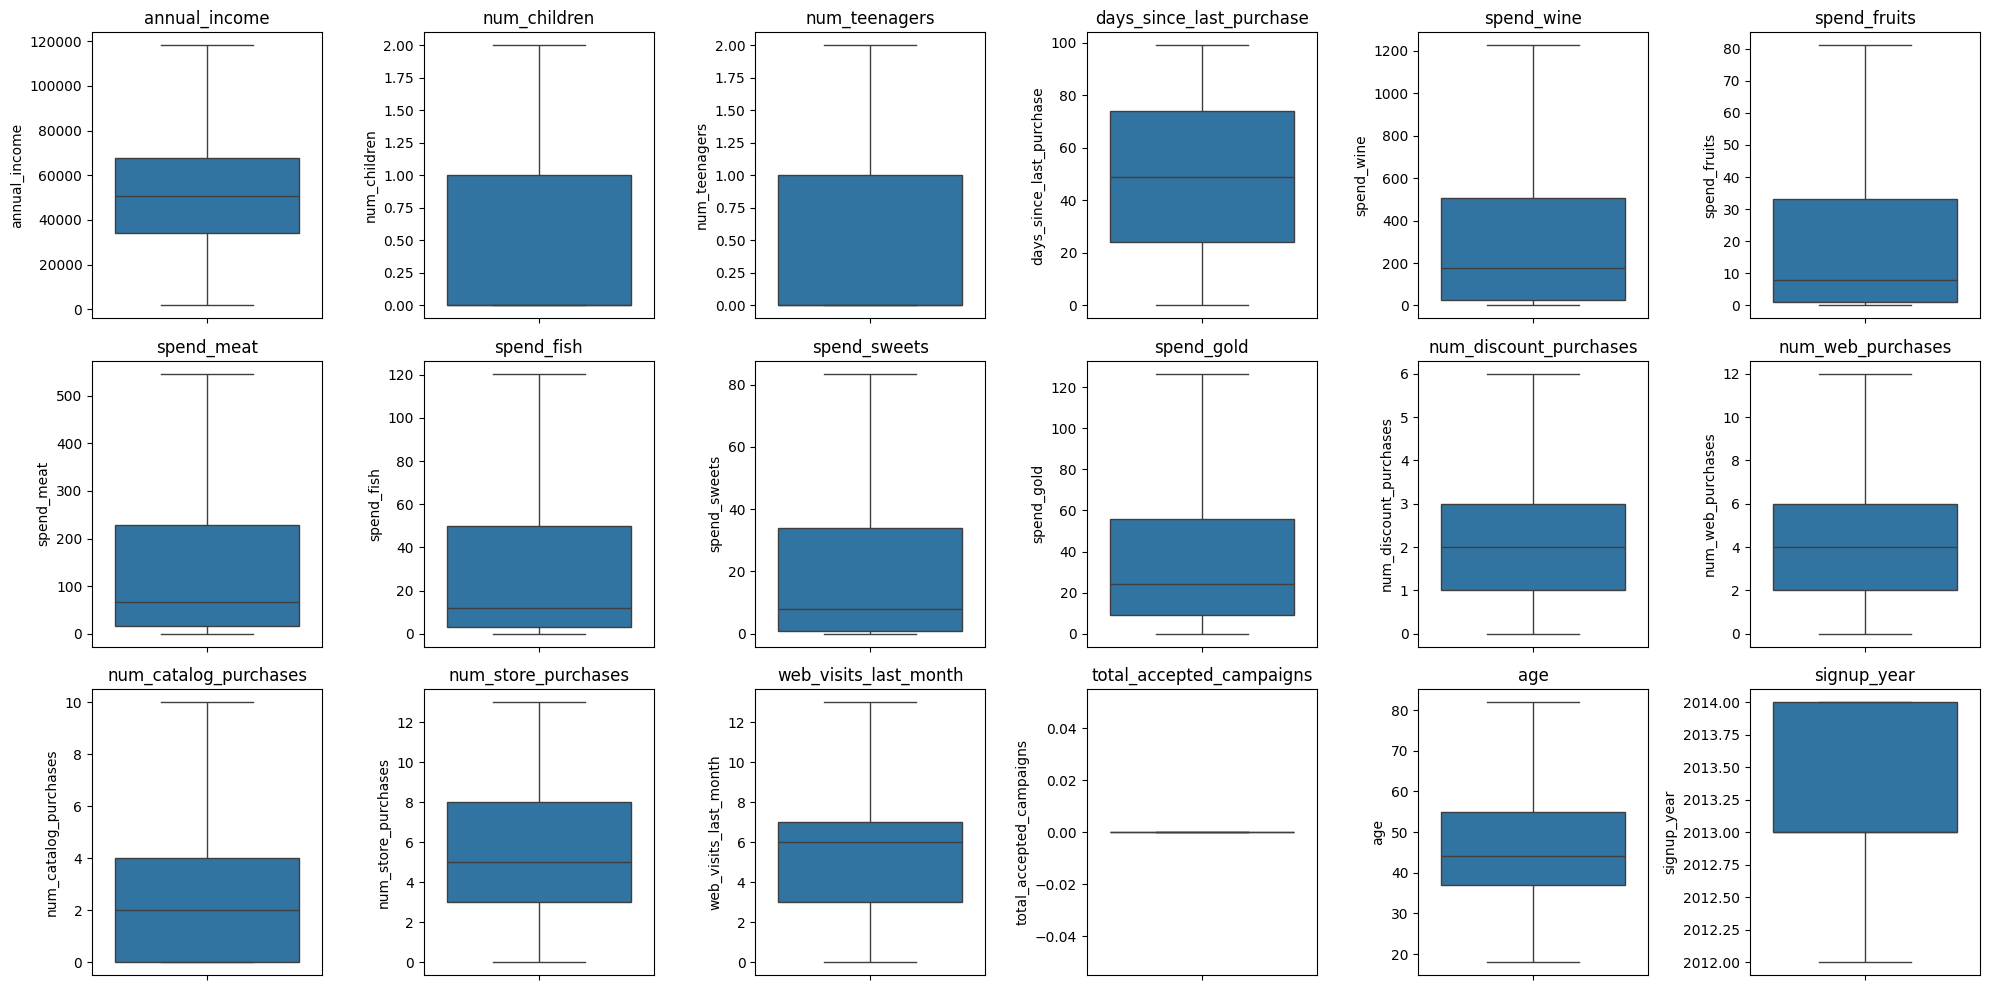

In [26]:
plt.figure(figsize=(20, 10))

rows = 3
cols = 6

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

In [27]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols


Index(['education_level', 'marital_status'], dtype='object')

### Encoding

In [28]:
label_encoder= LabelEncoder()

df['education_level'] = label_encoder.fit_transform(df['education_level'])
df['marital_status'] = label_encoder.fit_transform(df['marital_status'])

In [31]:
df.head()

,education_level,marital_status,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year
0,2,4,58138.0,0,0.0,58,635.0,81,546,120.5,83.5,88.0,3,8,10,4,7,0,57,2012
1,2,4,46344.0,1,1.0,38,11.0,1,6,2.0,1.0,6.0,2,1,1,2,5,0,60,2014
2,2,5,71613.0,0,0.0,26,426.0,49,127,111.0,21.0,42.0,1,8,2,10,4,0,49,2013
3,2,5,26646.0,1,0.0,26,11.0,4,20,10.0,3.0,5.0,2,2,0,4,6,0,30,2014
4,4,3,58293.0,1,0.0,94,173.0,43,118,46.0,27.0,15.0,5,5,3,6,5,0,33,2014


### Standardization

In [32]:
cols_to_standardize = [
    'annual_income',
    'age', 'signup_year', 'total_accepted_campaigns',
    'days_since_last_purchase',
    'spend_wine', 'spend_fruits', 'spend_meat', 'spend_fish', 'spend_sweets', 'spend_gold',
    'num_children', 'num_teenagers',
    'num_discount_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
    'web_visits_last_month'
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])


In [33]:
df_scaled.head()

,education_level,marital_status,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year
0,2,4,0.341631,-0.826391,-0.916034,0.306396,1.007552,2.180131,2.227725,2.196210,2.182991,1.221036,0.503791,1.476371,2.708574,-0.550699,0.725583,0.0,1.001774,-1.504621
1,2,4,-0.189989,1.031408,0.916925,-0.383540,-0.883047,-0.759050,-0.811742,-0.743848,-0.753909,-0.836323,-0.146333,-1.158842,-0.593621,-1.168359,-0.125343,0.0,1.257132,1.412443
2,2,5,0.949023,-0.826391,-0.916034,-0.797501,0.374323,1.004458,-0.130676,1.960509,-0.041933,0.066908,-0.796457,1.476371,-0.226710,1.302280,-0.550806,0.0,0.320821,-0.046089
3,2,5,-1.077886,1.031408,-0.916034,-0.797501,-0.883047,-0.648831,-0.732941,-0.545363,-0.682711,-0.861413,-0.146333,-0.782383,-0.960532,-0.550699,0.300120,0.0,-1.296443,1.412443
4,4,3,0.348618,1.031408,-0.916034,1.548280,-0.392219,0.784020,-0.181334,0.347819,0.171660,-0.610515,1.804038,0.346994,0.140200,0.066961,-0.125343,0.0,-1.041086,1.412443


## Clustering

### Finding the best K

In [54]:
ToVar = []
SilScore = []
StartK = 2
EndK = 15
clustering_features = [
    'annual_income',
    'spend_wine',
    'spend_fruits',
    'spend_meat',
    'spend_fish',
    'spend_sweets',
    'spend_gold',
    'signup_year',
    'days_since_last_purchase',
    'num_discount_purchases',
    'web_visits_last_month',
    'num_web_purchases',
    'num_catalog_purchases',
    'num_store_purchases',
    'age',
    'num_children',
    'num_teenagers',
    'total_accepted_campaigns',
    'education_level',
    'marital_status'
]
for k in range(StartK, EndK):
    kmeanModel = KMeans(n_clusters=k,init="k-means++",n_init="auto",random_state=10)
    kmeanModel.fit(df_scaled[clustering_features])
    SilScore.append(silhouette_score(df_scaled[clustering_features], kmeanModel.labels_))
    ToVar.append(kmeanModel.inertia_)


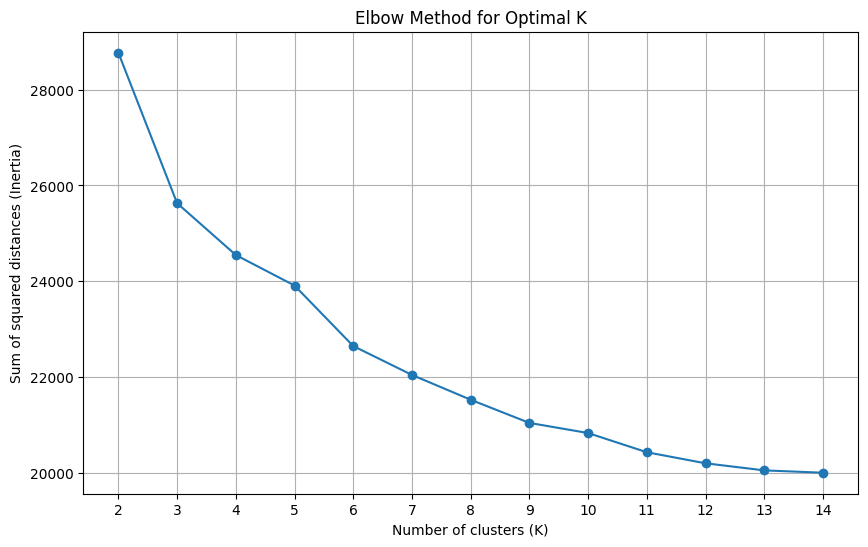

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(range(StartK, EndK), ToVar, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.xticks(range(StartK, EndK))
plt.grid(True)
plt.show()

In [56]:
LoopResult = pd.DataFrame(np.arange(StartK,EndK,1),columns=['K_Values'])
LoopResult['Silhouette_Score'] = SilScore
LoopResult['Var'] = ToVar
LoopResult

,K_Values,Silhouette_Score,Var
0,2,0.265137,28772.776859
1,3,0.196878,25630.616823
2,4,0.166402,24547.456114
3,5,0.154848,23910.008188
4,6,0.107700,22646.382013
5,7,0.098505,22043.027325
6,8,0.103955,21524.584435
7,9,0.098925,21040.786711
8,10,0.098348,20829.164298
9,11,0.095178,20428.269250


## Clustering with K=6

In [74]:
kmeans = KMeans(n_clusters=6, init="k-means++", n_init="auto", random_state=0)
df_scaled['clusters'] = kmeans.fit_predict(df_scaled[clustering_features])


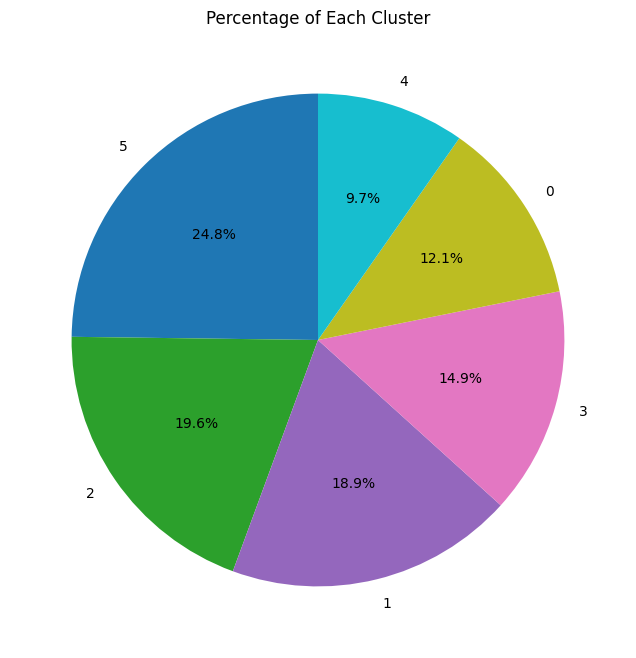

In [75]:
plt.figure(figsize=(8, 8))
df_scaled['clusters'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab10')
plt.title('Percentage of Each Cluster')
plt.ylabel('') # Hide the default 'clusters' label on the y-axis
plt.show()